<a href="https://colab.research.google.com/github/Chandan975/fashion-minst-classification-99-25-accuracyByChandan/blob/main/f_minst_ByChandan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

2.8.2


In [9]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

(60000, 28, 28)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

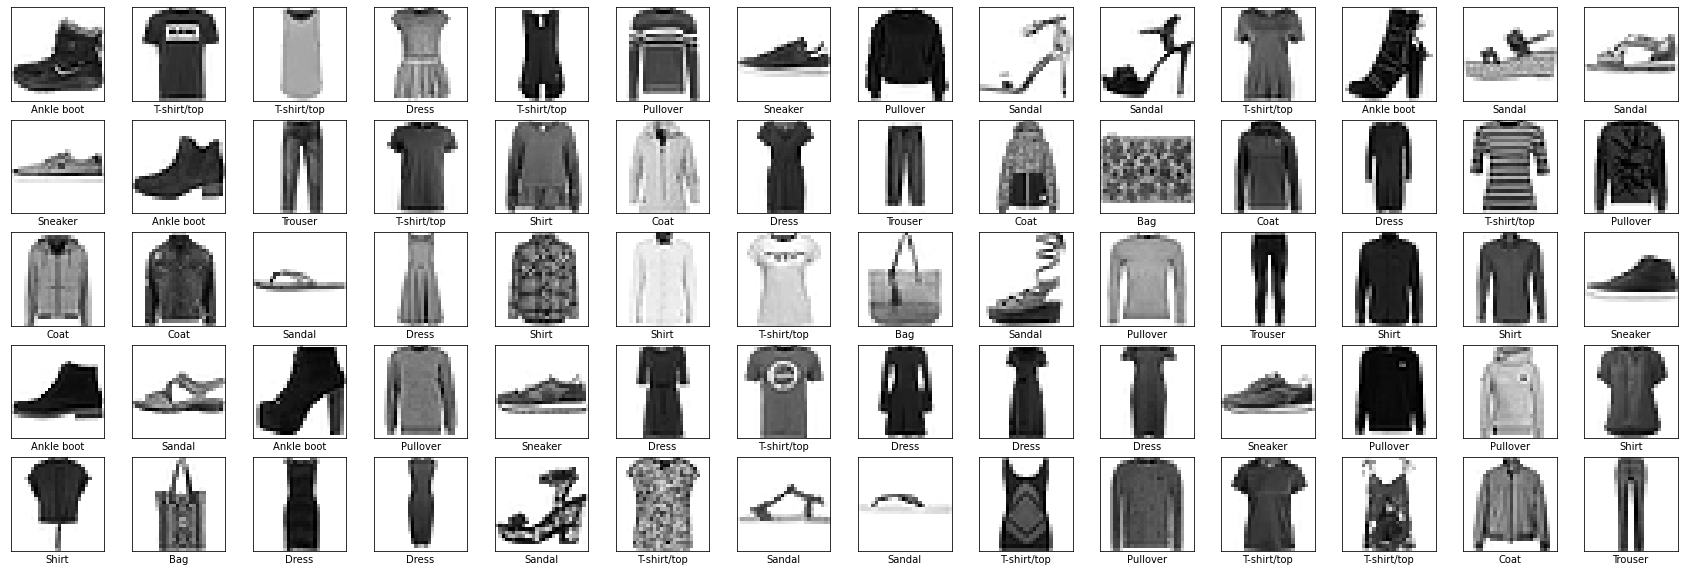

In [4]:
# plot some data
plt.figure(figsize=(30,10))

for i in range(70):
    plt.subplot(5,14,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
x_train = np.expand_dims(train_images, 
                         axis=-1)
y_train = tf.keras.utils.to_categorical(train_labels, 
                                        num_classes=len(class_names))
x_train.shape

(60000, 28, 28, 1)

In [6]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    
    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),  
    tf.keras.layers.MaxPooling2D((2, 2)), 

    tf.keras.layers.Conv2D(56, (3,3), activation='relu'),  
    
    tf.keras.layers.Flatten(), 
     
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4121 - accuracy: 0.8525
Epoch 2/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2727 - accuracy: 0.9017
Epoch 3/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2243 - accuracy: 0.9172
Epoch 4/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1903 - accuracy: 0.9296
Epoch 5/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1609 - accuracy: 0.9404
Epoch 6/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1368 - accuracy: 0.9489
Epoch 7/20
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1161 - accuracy: 0.9567
Epoch 8/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0994 - accuracy: 0.9626
Epoch 9/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0820 - accuracy: 0.9688
Epoch 10/20
1875/1875 [==============================] - 53s 28m

In [7]:
x_test = np.expand_dims(train_images, 
                        axis = -1)
y_test = tf.keras.utils.to_categorical(train_labels, 
                                       num_classes=len(class_names))


test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0272 - accuracy: 0.9898
Test accuracy: 0.9897833466529846
